<a href="https://colab.research.google.com/github/Arthur6363/Deep-Learning-ML/blob/main/Keras_ile_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

In [2]:
(train_images, train_labels)= mnist.load_data()[0]

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
(test_images, test_labels)=mnist.load_data()[0]

In [5]:
train_images.shape

(60000, 28, 28)

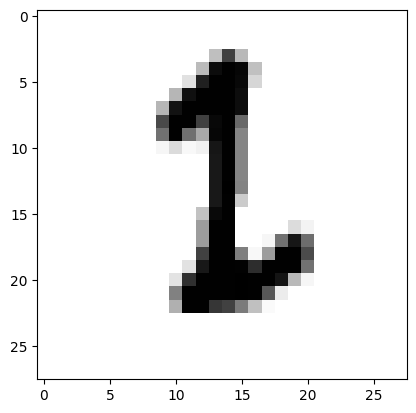

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_images[70], cmap="gray_r")
plt.show()

In [7]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)

In [8]:
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [9]:
train_images.shape

(60000, 28, 28, 1)

In [10]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

In [11]:
train_images = train_images/255
test_images = test_images/255

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout,Flatten,MaxPooling2D
model = Sequential()
input_shape=(28,28,1)
model.add(Conv2D(28,kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0,2))
model.add(Dense(10, activation="softmax"))

In [17]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                      

In [18]:
history = model.fit(x=train_images, y=train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 60s 31ms/step - loss: 0.1807 - accuracy: 0.9460
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0640 - accuracy: 0.9808
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0391 - accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0252 - accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0185 - accuracy: 0.9939
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0131 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0107 - accuracy: 0.9964
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0084 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0096 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 36s 19m

In [21]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)
print("test_loss=", test_loss)
print("test_accuracy=", test_accuracy)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0048 - accuracy: 0.9983
test_loss= 0.00484445970505476
test_accuracy= 0.9982500076293945


In [23]:
hist_dict=history.history

In [24]:
hist_dict.keys()

dict_keys(['loss', 'accuracy'])

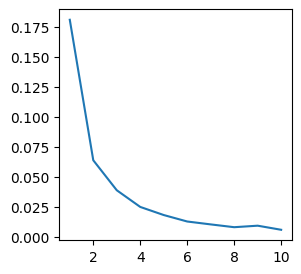

In [30]:
plt.figure(figsize=(3,3))
epochs = range(1,11)
loss =  hist_dict["loss"]
plt.plot(epochs, loss)
plt.show()

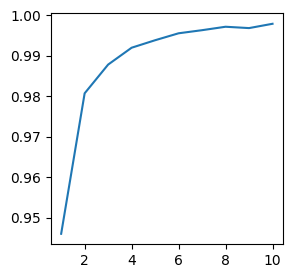

In [31]:
plt.figure(figsize=(3,3))
accuracy = hist_dict["accuracy"]
plt.plot(epochs, accuracy)
plt.show()

In [32]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
from keras.models import load_model
model = load_model("model.h5")

In [34]:
import random
i = random.randint(1,100)
prediction = model.predict(test_images[i].reshape(1,28,28,1))

1/1 [==============================] - 0s 427ms/step


In [36]:
print(prediction)

[[1.0000000e+00 9.0412618e-20 2.5442581e-09 6.7145530e-16 1.3342702e-13
  7.5533824e-15 2.3406826e-12 3.8624239e-16 3.4658276e-13 1.4390919e-14]]


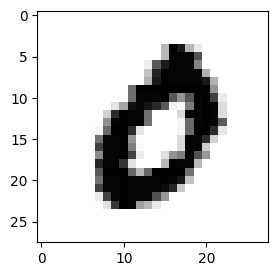

In [38]:
plt.figure(figsize=(3,3))
plt.imshow(test_images[i].reshape(28,28), cmap="gray_r")
plt.show()

1/1 [==============================] - 0s 23ms/step
4


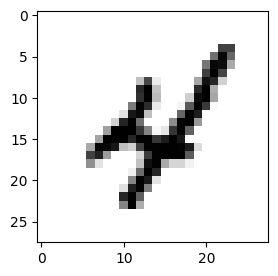

In [43]:
i = random.randint(1,100)
prediction = model.predict(test_images[i].reshape(1,28,28,1))
print(prediction.argmax())

plt.figure(figsize=(3,3))
plt.imshow(test_images[i].reshape(28,28), cmap="gray_r")
plt.show()

1/1 [==============================] - 0s 74ms/step
2


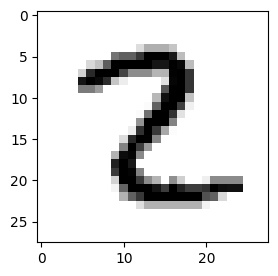

In [42]:
i = random.randint(1,100)
prediction = model.predict(test_images[i].reshape(1,28,28,1))
print(prediction.argmax())

plt.figure(figsize=(3,3))
plt.imshow(test_images[i].reshape(28,28), cmap="gray_r")
plt.show()